In [ ]:
#step 1
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
#step 2
df = pd.read_csv('/content/Cdac_Customer_Churn.csv')
# Basic understanding
print(df.shape)
print(df.info())
df.head(10)


(100000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customerID        100000 non-null  object 
 1   Churn             100000 non-null  object 
 2   gender            100000 non-null  object 
 3   SeniorCitizen     100000 non-null  int64  
 4   Partner           100000 non-null  object 
 5   Dependents        100000 non-null  object 
 6   tenure            100000 non-null  int64  
 7   PhoneService      100000 non-null  object 
 8   MultipleLines     100000 non-null  object 
 9   InternetService   100000 non-null  object 
 10  OnlineSecurity    100000 non-null  object 
 11  OnlineBackup      100000 non-null  object 
 12  DeviceProtection  100000 non-null  object 
 13  TechSupport       100000 non-null  object 
 14  StreamingTV       100000 non-null  object 
 15  StreamingMovies   100000 non-null  object 
 16  Contract

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,Female,0,Yes,No,1,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,No,Male,0,No,No,34,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Yes,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,No,Male,0,No,No,45,No,No phone service,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Yes,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,Yes,Female,0,No,No,8,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,No,Male,0,No,Yes,22,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,No,Female,0,No,No,10,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,Yes,Female,0,Yes,No,28,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,No,Male,0,No,Yes,62,Yes,No,DSL,...,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [ ]:
# STEP 3 (Table Safe version): Show unique values only for columns that still exist
columns_to_check = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Filter columns that are actually present in the DataFrame
columns_present = [col for col in columns_to_check if col in df.columns]

# Create list of (column, unique values)
unique_values = [(col, df[col].unique().tolist()) for col in columns_present]

# Display as a table
pd.DataFrame(unique_values, columns=['Column Name', 'Unique Values'])

,Column Name,Unique Values
0,gender,"[Female, Male]"
1,SeniorCitizen,"[0, 1]"
2,Partner,"[Yes, No]"
3,Dependents,"[No, Yes]"
4,PhoneService,"[No, Yes]"
5,MultipleLines,"[No phone service, No, Yes]"
6,InternetService,"[DSL, Fiber optic, No]"
7,OnlineSecurity,"[No, Yes, No internet service]"
8,OnlineBackup,"[Yes, No, No internet service]"
9,DeviceProtection,"[No, Yes, No internet service]"


In [ ]:
# STEP 4: Clean and prepare the data
# 4A. Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:

# 4B. Drop rows where TotalCharges is missing
print("Before dropping:", df.shape)
print("Nulls in TotalCharges:", df['TotalCharges'].isnull().sum())
df = df[df['TotalCharges'].notnull()].copy()
print("After dropping:", df.shape)



Before dropping: (100000, 21)
Nulls in TotalCharges: 136
After dropping: (99864, 21)


In [ ]:
# 4C. Drop 'customerID' if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


In [ ]:
# 4D. Convert binary columns (Yes/No, Male/Female) to 1/0
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

In [ ]:
# 4E. One-hot encode remaining categorical columns

df = pd.get_dummies(df, drop_first=True)


In [ ]:
# 4F. Normalize numerical columns

if df.shape[0] > 0:
    scaler = StandardScaler()
    df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
        df[['tenure', 'MonthlyCharges', 'TotalCharges']]
    )
else:
    print("DataFrame is empty after cleaning.")

In [ ]:
# STEP 5: Train-Test Split

# 5A: Drop rows with missing Churn values (if any)
df = df[df['Churn'].notnull()].copy()


In [ ]:
# 5B: Define input features (X) and target label (y)

X = df.drop('Churn', axis=1)   # All features except target
y = df['Churn']                # Target column (Churn)

In [ ]:
# 5C: Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% test data
    random_state=42,          # Reproducibility
    stratify=y                # Maintain class balance
)


In [ ]:
# 5D: Confirm shape of the splits

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (79891, 30)
Testing set shape: (19973, 30)


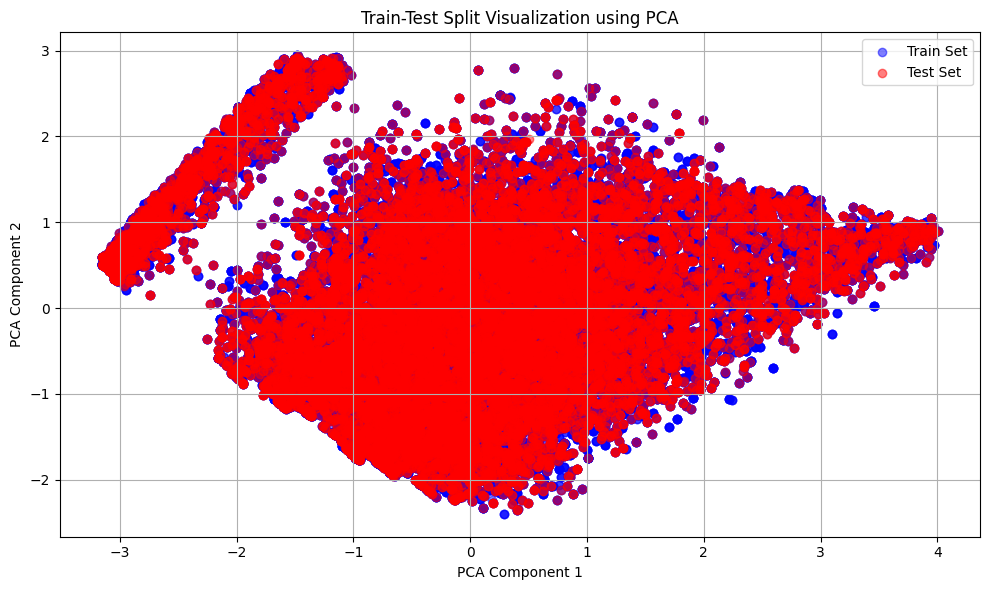

In [ ]:
#Step 5.2 (Optional)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA (Principal Component Analysis) to reduce features to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Plotting the PCA projection
plt.figure(figsize=(10, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='blue', label='Train Set', alpha=0.5)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c='red', label='Test Set', alpha=0.5)
plt.title('Train-Test Split Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 6: Train all 4 classification models

# 6A. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

In [ ]:
# 6B. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 6C. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# 6D. XGBoost
xgb_model = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:48:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# STEP 7: Evaluate All Trained Models

# 7A. Create a dictionary of all models
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

In [ ]:
# 7B. Loop through each model and print evaluation metrics
for name, model in models.items():
    print("="*60)
    print(f"Model: {name}")

    # Predict class labels
    y_pred = model.predict(X_test)

    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Print classification report (precision, recall, f1-score)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # If model supports probability prediction, calculate ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_score = roc_auc_score(y_test, y_prob)
        print(f"ROC-AUC Score: {roc_score:.4f}")

Model: Logistic Regression

Confusion Matrix:
[[14148   527]
 [ 4247  1051]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     14675
           1       0.67      0.20      0.31      5298

    accuracy                           0.76     19973
   macro avg       0.72      0.58      0.58     19973
weighted avg       0.74      0.76      0.71     19973

ROC-AUC Score: 0.6849
Model: Decision Tree

Confusion Matrix:
[[14658    17]
 [   29  5269]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14675
           1       1.00      0.99      1.00      5298

    accuracy                           1.00     19973
   macro avg       1.00      1.00      1.00     19973
weighted avg       1.00      1.00      1.00     19973

ROC-AUC Score: 0.9987
Model: Random Forest

Confusion Matrix:
[[14664    11]
 [   33  5265]]

Classification Report:
           